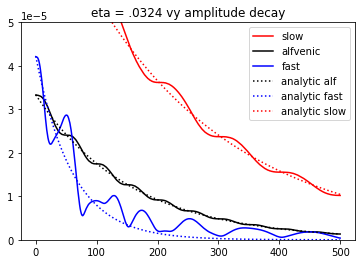

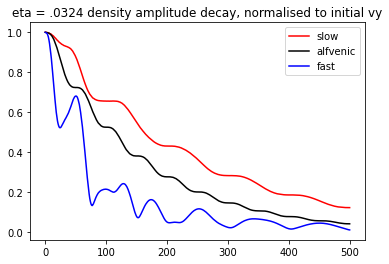

In [2]:
import numpy as np
from matplotlib import pylab as plt
import athena_read

#Time evolution for the AD cases

import numpy as np
from matplotlib import pyplot as plt
#set up time array for referencing files in the format that athena outputs

lin_space = np.linspace(0,500,501)
file_list = []

for n in lin_space:
    n = str(int(n))
    while len(n) < 5:
        n = '0'+n
    file_list.append(n)


#set up max rho list to plot amplitude vs time later
vy_max_arr = []
vy_max_arr2 = []
vy_max_arr3 = []

#redefine vy_plot to be used for this specific subsection

def rho_plot(file_name,plot_name):
  
    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []
    #print(data)
    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)

   
    rho = data['rho'][0][0]

    plt.plot(x_avg,rho,label = plot_name)
    #return maxima to show time evolution
    return max(rho)

def vely_plot(file_name,plot_name):

    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)


    vel = data['vel'][0][0][:,1]
    #plt.plot(x_avg,vel,label = plot_name)
    #return maxima to show time evolution
    return max(vel)

for t in file_list:
    vy_max_arr.append(vely_plot('./1d_slow/LinWave.block0.out2.'+t+'.vtk',t+' slow'))
    vy_max_arr2.append(vely_plot('./1d_alf/LinWave.block0.out2.'+t+'.vtk',t+' alfvenic'))
    vy_max_arr3.append(vely_plot('./1d_fast/LinWave.block0.out2.'+t+'.vtk',t+' fast'))
#plt.show()


#initial perturbation taken from analytical solutions for non-damped
vy_fast = 4.219867438701534e-05
vy_alf = 3.333333333333333e-05
vy_slow = 8.430990907875269e-05

#plot numerical solutions
plt.title('eta = .0324 vy amplitude decay')
plt.plot(lin_space,vy_max_arr,label = 'slow', color = 'r')
plt.plot(lin_space,vy_max_arr2,label = 'alfvenic', color='k')
plt.plot(lin_space,vy_max_arr3,label = 'fast', color = 'b')

#plot analytical solutions
#taken from ideal MHD
v_alf = 1.803
theta = .9823
w_a = 100

Q_a = (v_alf**2)*((np.cos(theta))**2)/w_a

gamma_a = Q_a*2*(np.pi**2)
gamma_f = Q_a*5.2*(np.pi**2)
gamma_s = Q_a*1.3*(np.pi**2)

ana_a_vely = []
ana_f_vely = []
ana_s_vely = []

for t in lin_space:
    t = .01*t #adjust to code dt
    #3.25 is B0 **2
    ana_a_vely.append(vy_alf*np.exp(-3.25*gamma_a*t))
    ana_f_vely.append(vy_fast*np.exp(-3.25*gamma_f*t))
    ana_s_vely.append(vy_slow*np.exp(-3.25*gamma_s*t))

plt.plot(lin_space,ana_a_vely,'k:',label = 'analytic alf')  
plt.plot(lin_space,ana_f_vely,'b:',label = 'analytic fast')
plt.plot(lin_space,ana_s_vely,'r:',label = 'analytic slow')


plt.ylim([0,5e-5])
plt.legend()
plt.show()

#normalise to 5e-5, like bai and stone


vy_max_arr[:] = [i/vy_slow for i in vy_max_arr]
vy_max_arr2[:] = [i/vy_alf for i in vy_max_arr2]
vy_max_arr3[:] = [i/vy_fast for i in vy_max_arr3]

plt.title('eta = .0324 density amplitude decay, normalised to initial vy')
plt.plot(lin_space,vy_max_arr,label = 'slow',color = 'r')
plt.plot(lin_space,vy_max_arr2,label = 'alfvenic',color = 'k')
plt.plot(lin_space,vy_max_arr3,label = 'fast',color = 'b')


plt.legend()
plt.show()
